In [ ]:
import pandas as pd
import numpy as np
from  xgboost import  XGBClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
pd.set_option('display.max_columns', 200)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/학술/최종데이터_최종.csv')

In [ ]:
df

,Punctuation,Number,Noun,KoreanParticle,Verb,Adverb,Foreign,Alpha,Josa,Adjective,Determiner,Modifier,Suffix,Exclamation,Hashtag,Conjunction,VerbPrefix,Eomi,PreEomi,URL,goal,img,length,funding_term,생산자물가(전월대비%),동행지수순환변동치(경기종합지수),선행지수순환변동치(경기종합지수),소비자물가(전년도대비%),취업자증감(%),실업률(%),청년실업률(%),경제성장률(실질GDP성장률),covid,pf,mini,maxi,medi,가격,가방,가성비,가죽,감성,겨울,기능,기능성,끝,끝판,노트북,니트,다이아몬드,당신,데일리,디자이너,디자인,마스크,마지막,매일,맨투맨,멋,메이드,명품,모두,목걸이,미니,바지,반지,발,백,봄,브라,브랜드,선글라스,선물,세상,세트,셋업,셔츠,소재,손,수납,수량,수제,스니커즈,스타일,스트랩,시계,신발,실용,안경,앵콜,양말,여름,여행,옷,완성,우리,원단,원피스,웨어,이제,이태리,인생,일상,자켓,장인,주얼리,지갑,진짜,천연,카드,캐시미어,컬러,케이스,코트,퀄리티,클래식,템,티,티셔츠,파우치,패션,팩,팬츠,팬티,펀딩,편안함,평점,프로젝트,프리미엄,핏,하나,하나로,한국,한복,한정,핸드,후드,sucess,fail,new
0,4.0,2.0,7.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000000,24,40,7,8.2,102.3,99.3,5.7,80.7,2.1,5.4,3.1,149849.0,1,2480.879883,2533.52002,2523.780029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500000,27,28,7,8.2,102.3,99.3,5.7,80.7,2.1,5.4,3.1,149849.0,1,2480.879883,2533.52002,2523.780029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.761987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.647593,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,35.0,1.0,0.0
2,3.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500000,25,35,7,8.2,102.3,99.3,5.7,80.7,2.1,5.4,3.1,149849.0,1,2480.879883,2533.52002,2523.780029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,14.0,1.0,0.0
3,4.0,0.0,9.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500000,45,39,10,8.2,102.3,99.3,5.7,80.7,2.1,5.4,3.1,55242.0,1,2480.879883,2533.52002,2512.260010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.675001,0.0,0.0,0.0,0.0,0.0,0.0,0.737816,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500000,62,19,9,8.2,102.3,99.3,5.7,80.7,2.1,5.4,3.1,105455.0,1,2480.879883,2533.52002,2513.619995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
X = df[['goal', 'img', 'length', 'funding_term', 'sucess', 'fail', 'new', 'mini', 'maxi', 'medi']]
y = df['pf']

In [ ]:
X

,goal,img,length,funding_term,sucess,fail,new,mini,maxi,medi
0,1000000,24,40,7,0.0,0.0,1.0,2480.879883,2533.52002,2523.780029
1,500000,27,28,7,35.0,1.0,0.0,2480.879883,2533.52002,2523.780029
2,500000,25,35,7,14.0,1.0,0.0,2480.879883,2533.52002,2523.780029
3,500000,45,39,10,0.0,0.0,1.0,2480.879883,2533.52002,2512.260010
4,500000,62,19,9,0.0,0.0,1.0,2480.879883,2533.52002,2513.619995
...,...,...,...,...,...,...,...,...,...,...
9962,1000000,152,40,31,0.0,0.0,1.0,2403.689941,2533.52002,2473.110107
9963,500000,136,38,31,28.0,0.0,0.0,2393.139893,2533.52002,2473.110107
9964,500000,46,34,40,0.0,0.0,1.0,2393.139893,2533.52002,2467.275024
9965,500000,49,19,42,0.0,0.0,1.0,2317.760010,2533.52002,2445.560059


In [ ]:
y

0       1
1       1
2       1
3       1
4       1
       ..
9962    0
9963    1
9964    1
9965    1
9966    1
Name: pf, Length: 9967, dtype: int64

In [ ]:
X1 =  df['Number', 'Punctuation', 'Modifier', 'Verb', 'Noun', 'Adjective', '앵콜',
       '맨투맨', '가죽', '데일리', 'sucess', 'fail', 'new', 'covid', 'goal', 'img',
       'length', 'funding_term', 'mini', 'maxi', 'medi']
y1 = df['pf']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.3, random_state=42)

In [ ]:
X_train

,goal,img,length,funding_term,sucess,fail,new
468,1000000,95,39,21,1.0,0.0,0.0
1545,1000000,51,35,18,0.0,0.0,1.0
8077,2000000,47,39,15,0.0,0.0,1.0
2683,1000000,76,39,21,3.0,0.0,0.0
9875,500000,52,33,6,1.0,0.0,0.0
...,...,...,...,...,...,...,...
5734,1000000,36,18,35,0.0,0.0,1.0
5191,1000000,12,36,55,0.0,0.0,1.0
5390,500000,110,39,18,2.0,0.0,0.0
860,500000,47,39,7,0.0,0.0,1.0


In [ ]:
y_train

468     1
1545    1
8077    1
2683    1
9875    1
       ..
5734    1
5191    0
5390    1
860     1
7270    1
Name: pf, Length: 6976, dtype: int64

In [ ]:
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
lgbm = LGBMClassifier(random_state=42)
gbt = GradientBoostingClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators' : [50,100,150,200],
          'learning_rate' : [0.001,0.01, 0.1],
          'max_depth' : [3,4,5,6,7],
          'subsample' : [0.5,0.7,1]
          }

from  xgboost import  XGBClassifier

gs = GridSearchCV(XGBClassifier(random_state=42), params, n_jobs=-1, cv = 10)

In [ ]:
gs.fit(X1_train,y1_train)

GridSearchCV(cv=10, estimator=XGBClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [3, 4, 5, 6, 7],
                         'n_estimators': [50, 100, 150, 200],
                         'subsample': [0.5, 0.7, 1]})

In [ ]:
print(gs.best_params_)

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.7}


In [ ]:
xgb = XGBClassifier(random_state=42, learning_rate=0.1, max_depth=5, n_estimators=50, subsmaple=0.7)
xgb.fit(X1_train,y1_train)
y_predict_train = xgb.predict(X1_train)
y_predict = xgb.predict(X1_test)
print("Classification Refort")
print(classification_report(y1_train, y_predict_train))
print(classification_report(y1_test, y_predict))

Classification Refort
              precision    recall  f1-score   support

           0       0.81      0.12      0.21      1248
           1       0.84      0.99      0.91      5728

    accuracy                           0.84      6976
   macro avg       0.82      0.56      0.56      6976
weighted avg       0.83      0.84      0.78      6976

              precision    recall  f1-score   support

           0       0.63      0.08      0.15       511
           1       0.84      0.99      0.91      2480

    accuracy                           0.83      2991
   macro avg       0.73      0.54      0.53      2991
weighted avg       0.80      0.83      0.78      2991



/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50549 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53084 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_

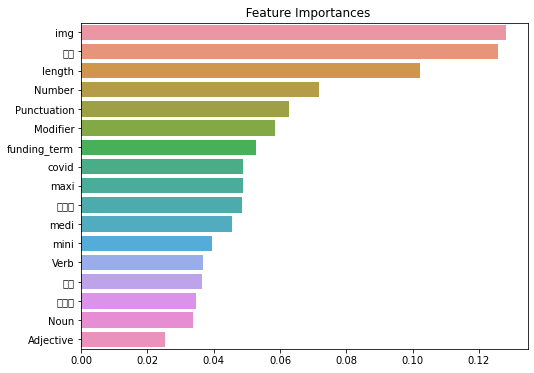

In [ ]:
ftr_importances_values = xgb.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X1_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title(" "+' Feature Importances')
sns.barplot(x=ftr_top[:20], y=ftr_top.index[:20])
plt.show()

In [ ]:

params = {'n_estimators' : [50,100,150,200],
          'learning_rate' : [0.001,0.01, 0.1],
          'max_depth' : [3,4,5,6,7],
          'subsample' : [0.5,0.7,1]
          }

gs1 = GridSearchCV(XGBClassifier(random_state=42), params, n_jobs=-1, cv = 10)

In [ ]:
gs1.fit(X_train,y_train)

In [ ]:
print(gs1.best_estimator_)

In [ ]:
xgb = XGBClassifier(random_state=42,)
xgb.fit(X_train,y_train)
y_predict_train = xgb.predict(X_train)
y_predict = xgb.predict(X_test)
print("Classification Refort")
print(classification_report(y_train, y_predict_train))
print(classification_report(y_test, y_predict))

XGBClassifier(random_state=42, subsamples=0.5)


In [ ]:
xgb = XGBClassifier(random_state=42,)
xgb.fit(X1_train,y1_train)
y_predict_train = xgb.predict(X1_train)
y_predict = xgb.predict(X1_test)
print("Classification Refort")
print(classification_report(y1_train, y_predict_train))
print(classification_report(y1_test, y_predict))

In [ ]:
models = [rf, xgb, lgbm, gbt]

In [ ]:
name = ["RF", "XGB", "LGBM", "GBT"]

In [ ]:
# 테스트 사이즈 0.3
for i in range(4):
  models[i].fit(X_train,y_train)
  y_predict_train = models[i].predict(X_train)
  y_predict = models[i].predict(X_test)
  print(name[i] +" "+"Classification Refort")
  print(classification_report(y_train, y_predict_train))
  print(classification_report(y_test, y_predict))

RF Classification Refort
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1248
           1       1.00      1.00      1.00      5728

    accuracy                           1.00      6976
   macro avg       1.00      1.00      1.00      6976
weighted avg       1.00      1.00      1.00      6976

              precision    recall  f1-score   support

           0       0.71      0.45      0.55       511
           1       0.89      0.96      0.93      2480

    accuracy                           0.87      2991
   macro avg       0.80      0.71      0.74      2991
weighted avg       0.86      0.87      0.86      2991

XGB Classification Refort
              precision    recall  f1-score   support

           0       0.81      0.47      0.60      1248
           1       0.89      0.98      0.93      5728

    accuracy                           0.89      6976
   macro avg       0.85      0.72      0.77      6976
weighted avg       0.88

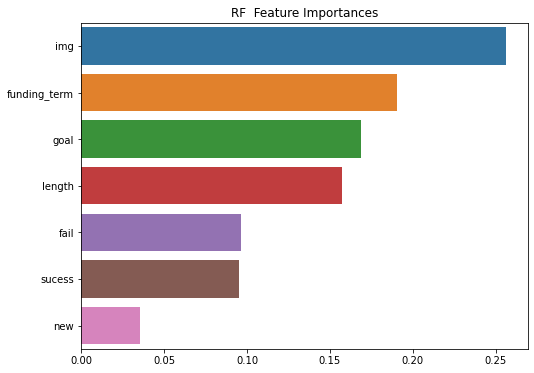

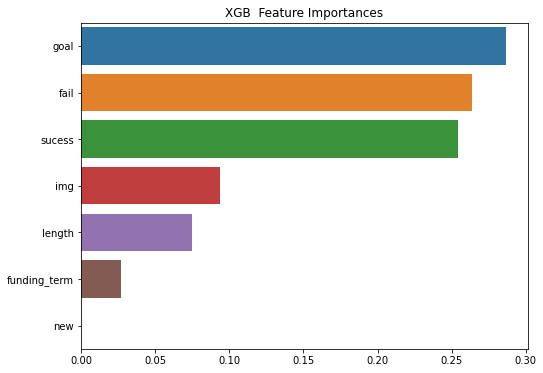

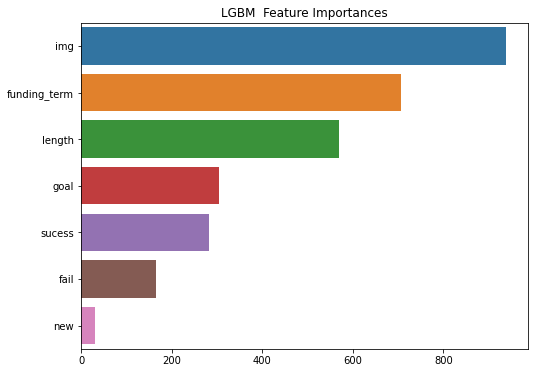

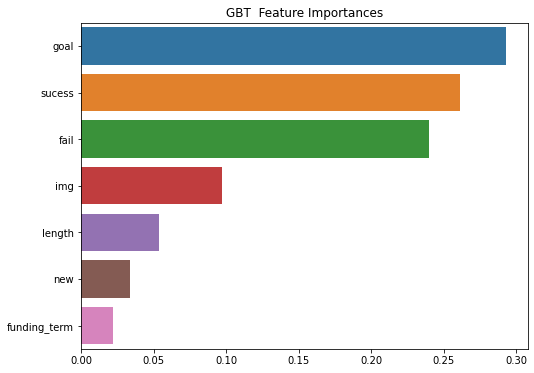

In [ ]:
for i in range(4):
  ftr_importances_values = models[i].feature_importances_
  ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
  ftr_top = ftr_importances.sort_values(ascending=False)

  plt.figure(figsize=(8,6))
  plt.title(name[i] + " "+' Feature Importances')
  sns.barplot(x=ftr_top[:20], y=ftr_top.index[:20])
  plt.show()

In [ ]:
# 테스트 사이즈 디폴트
for i in range(4):
  models[i].fit(X1_train,y1_train)
  y_predict_train = models[i].predict(X1_train)
  y_predict = models[i].predict(X1_test)
  print(name[i] +" "+"Classification Refort")
  print(classification_report(y1_train, y_predict_train))
  print(classification_report(y1_test, y_predict))

RF Classification Refort
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1326
           1       1.00      1.00      1.00      6149

    accuracy                           1.00      7475
   macro avg       1.00      0.99      0.99      7475
weighted avg       1.00      1.00      1.00      7475

              precision    recall  f1-score   support

           0       0.62      0.45      0.52       433
           1       0.89      0.94      0.92      2059

    accuracy                           0.86      2492
   macro avg       0.75      0.70      0.72      2492
weighted avg       0.84      0.86      0.85      2492

XGB Classification Refort
              precision    recall  f1-score   support

           0       0.82      0.47      0.59      1326
           1       0.89      0.98      0.93      6149

    accuracy                           0.89      7475
   macro avg       0.86      0.72      0.76      7475
weighted avg       0.88

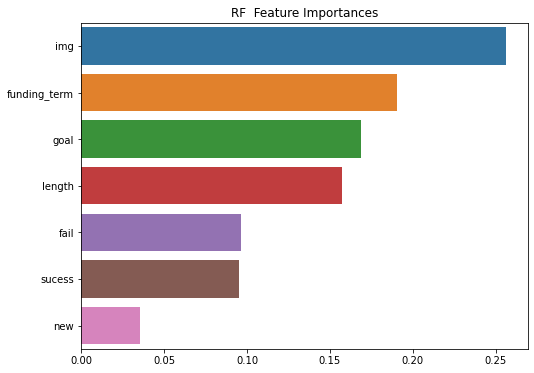

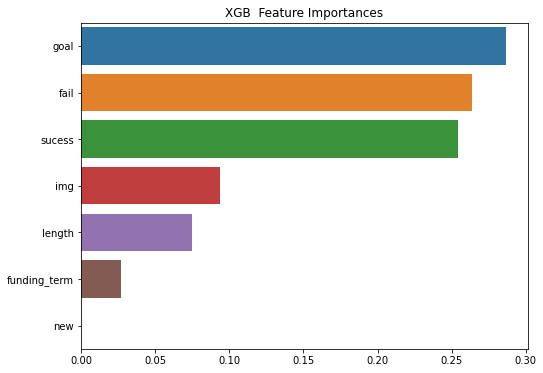

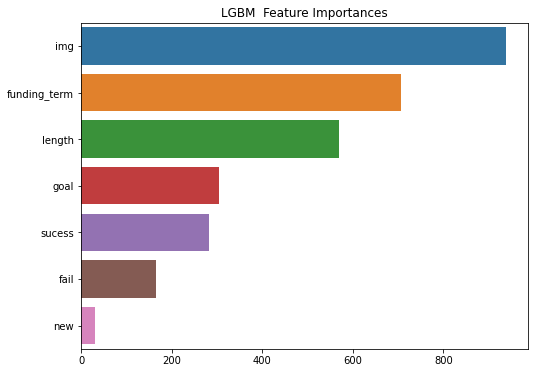

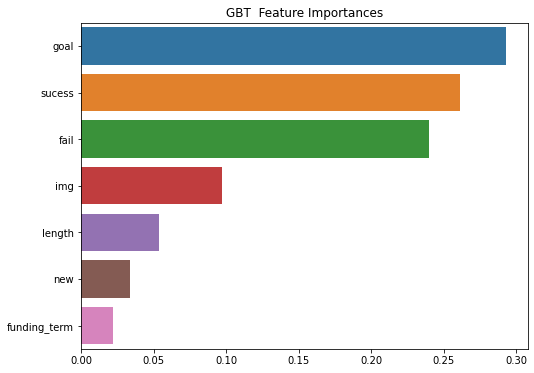

In [ ]:
for i in range(4):
  ftr_importances_values = models[i].feature_importances_
  ftr_importances = pd.Series(ftr_importances_values, index = X1_train.columns)
  ftr_top = ftr_importances.sort_values(ascending=False)

  plt.figure(figsize=(8,6))
  plt.title(name[i] + " "+' Feature Importances')
  sns.barplot(x=ftr_top[:20], y=ftr_top.index[:20])
  plt.show()

In [ ]:
params = {'n_estimators':, 'max_depth':, 'learning_rate':}

In [ ]:
X1 =  df['Number', 'Punctuation', 'Modifier', 'Verb', 'Noun', 'Adjective', '앵콜',
       '맨투맨', '가죽', '데일리', 'sucess', 'fail', 'new', 'covid', 'goal', 'img',
       'length', 'funding_term', 'mini', 'maxi', 'medi']
y1 = df['pf']

NameError: ignored